In [23]:
!ls

kaggle.json  sample_submission.csv  test.tar.gz
sample_data  test.csv		    train.csv


In [0]:
!tar -xvf train.tar.gz

In [0]:
!tar -xvf test.tar.gz

In [0]:
data = ImageDataBunch.from_folder('/content/trainingSet', valid_pct = 0.2).normalize()

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 86948789.05it/s]


In [33]:
data

ImageDataBunch;

Train: LabelList (33600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
1,1,1,1,1
Path: /content/trainingSet;

Valid: LabelList (8400 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,5,4,3,8
Path: /content/trainingSet;

Test: None

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


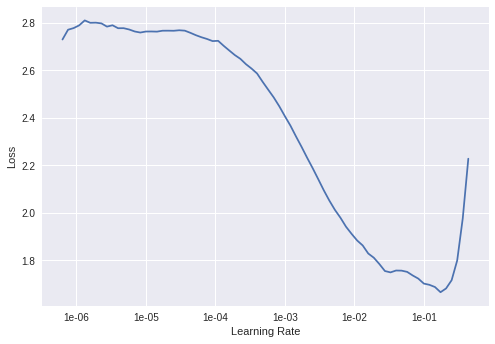

In [34]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.145850,0.113618,0.971548,22:52
1,0.059372,0.031388,0.992262,22:24
